# Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tools import read_merged_data
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")
random_state = 42
np.random.seed(random_state)

# Load Data

In [2]:
merged_data = read_merged_data(124)
merged_df = pd.concat(merged_data, axis = 0)
merged_df.head()

Opening UoB_Set01_2025-01-02tapes.csv
Opening UoB_Set01_2025-01-03tapes.csv
Opening UoB_Set01_2025-01-06tapes.csv
Opening UoB_Set01_2025-01-07tapes.csv
Opening UoB_Set01_2025-01-08tapes.csv
Opening UoB_Set01_2025-01-09tapes.csv
Opening UoB_Set01_2025-01-10tapes.csv
Opening UoB_Set01_2025-01-13tapes.csv
Opening UoB_Set01_2025-01-14tapes.csv
Opening UoB_Set01_2025-01-15tapes.csv
Opening UoB_Set01_2025-01-16tapes.csv
Opening UoB_Set01_2025-01-17tapes.csv
Opening UoB_Set01_2025-01-20tapes.csv
Opening UoB_Set01_2025-01-21tapes.csv
Opening UoB_Set01_2025-01-22tapes.csv
Opening UoB_Set01_2025-01-23tapes.csv
Opening UoB_Set01_2025-01-24tapes.csv
Opening UoB_Set01_2025-01-27tapes.csv
Opening UoB_Set01_2025-01-28tapes.csv
Opening UoB_Set01_2025-01-29tapes.csv
Opening UoB_Set01_2025-01-30tapes.csv
Opening UoB_Set01_2025-01-31tapes.csv
Opening UoB_Set01_2025-02-03tapes.csv
Opening UoB_Set01_2025-02-04tapes.csv
Opening UoB_Set01_2025-02-05tapes.csv
Opening UoB_Set01_2025-02-06tapes.csv
Opening UoB_

,Incoming bid,Incoming ask,Outgoing bid,Outgoing ask,alpha,beta,LOB,mid_price,low_ask,high_bid,Volume,Tapes Price,Last Tapes Price,zeta,spread
combined_time,,,,,,,,,,,,,,,
2025-01-02 08:00:00,[1 6],,,,NaN,NaN,"[['bid', [[1, 6]]], ['ask', []]]",NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2025-01-02 08:00:01,[261 1],[800 1][799 1][798 1][797 1],,[800 1][799 1][798 1],0.002986,0.015020,"[['bid', [[261, 1], [1, 6]]], ['ask', [[797, 1...",529.0,797.0,261.0,NaN,NaN,NaN,-0.012035,536.0
2025-01-02 08:00:02,[262 6],[338 3][297 5],[1 6],,0.238553,0.165031,"[['bid', [[262, 6], [261, 1]]], ['ask', [[297,...",279.5,297.0,262.0,NaN,NaN,NaN,0.073522,35.0
2025-01-02 08:00:03,[263 6][264 6],[296 1][309 3][334 4][292 5][291 1][296 4],[262 6][263 6],[338 3][297 5][797 1][296 1] [309 3],0.524854,0.429582,"[['bid', [[264, 6], [261, 1]]], ['ask', [[291,...",277.5,291.0,264.0,NaN,NaN,NaN,0.095272,27.0
2025-01-02 08:00:04,,[288 5][307 4][287 1] [296 3][287 4][300 4][28...,,[292 5][334 4][296 4][287 1] [296 3][307 4][29...,0.820913,0.541382,"[['bid', [[264, 6], [261, 1]]], ['ask', [[286,...",275.0,286.0,264.0,NaN,NaN,NaN,0.279531,22.0


In [7]:
merged_df["zeta"] = merged_df["alpha"] - merged_df["beta"]
merged_df["spread"] = merged_df["low_ask"] - merged_df["high_bid"]
merged_df["gap"] = merged_df["mid_price"] - merged_df["Last Tapes Price"]

# Prepare Samples

In [3]:
def generate_sample(day, day_index, rnd, sizings, sample_index, sampling_rate) -> pd.DataFrame:
    train_start_time = day.index[rnd] # when referencing start <= segment < end
    train_end_time = day.index[rnd + sizings[0]]
    test_end_time1 = day.index[rnd + sizings[1]]
    test_end_time2 = day.index[rnd + sizings[2]]
    test_end_time3 = day.index[rnd + sizings[3]]
    row = {"sample_index": sample_index,
           "train_size (s)": sizings[0],
           "day_index": day_index,
           "train_start_time": train_start_time,
           "train_end_time": train_end_time,
           "test_end_time1": test_end_time1,
           "test_end_time2": test_end_time2,
           "test_end_time3": test_end_time3,
           "sampling_rate (s)": sampling_rate}
    row = pd.DataFrame([row])
    return row

# extract intra day segments
# train/test size

sample_index = 0
indicies = pd.DataFrame()
for i, d in enumerate(merged_data):
    print(i, end = "\r")
    N = len(d)
    # random samples (3 each)

    for _ in range(100):
        # 1 min / 1s,10s,20s - (60,61,70,80)
        sizings = (60,61,70,80)
        row = generate_sample(d, i, np.random.randint(0,N - sizings[3]), sizings, sample_index, 1)
        indicies = pd.concat([indicies, row], axis = 0)
        sample_index += 1

        
        # 12 min / 12s,2min,4min
        sizings = (12*60, 12*60+12, 14*60, 16*60)
        row = generate_sample(d, i, np.random.randint(0,N - sizings[3]), sizings, sample_index, 1)
        indicies = pd.concat([indicies, row], axis = 0)
        sample_index += 1

        # 60 min / 1min,10min,20min
        sizings = (60*60, 61*60, 70*60, 80*60)
        row = generate_sample(d, i, np.random.randint(0,N - sizings[3]), sizings, sample_index, 2)
        indicies = pd.concat([indicies, row], axis = 0)
        sample_index += 1

    # fixed samples
    # 3hr / 3min,30min,1hr
    # start_times = (8:00, 10:15, 12:30)
    sizings = (60*60*3, 60*60*3 + 3*60, 60*60*3 + 30*60, 60*60*4)
    row = generate_sample(d, i, 0, sizings, sample_index, 5) # 8:00
    indicies = pd.concat([indicies, row], axis = 0)
    sample_index += 1

    sizings = (60*60*3, 60*60*3 + 3*60, 60*60*3 + 30*60, 60*60*4)
    row = generate_sample(d, i, 15*60*9, sizings, sample_index, 5) # 10:15
    indicies = pd.concat([indicies, row], axis = 0)
    sample_index += 1

    sizings = (60*60*3, 60*60*3 + 3*60, 60*60*3 + 30*60, 60*60*4)
    row = generate_sample(d, i, 30*60*9 - 1, sizings, sample_index, 5) # 12:30
    indicies = pd.concat([indicies, row], axis = 0)
    sample_index += 1

indicies.index = indicies["sample_index"]
indicies.drop("sample_index", axis = 1, inplace=True)
indicies

,train_size (s),day_index,train_start_time,train_end_time,test_end_time1,test_end_time2,test_end_time3,sampling_rate (s)
sample_index,,,,,,,,
0,60,0,2025-01-02 14:34:14,2025-01-02 14:35:14,2025-01-02 14:35:15,2025-01-02 14:35:24,2025-01-02 14:35:34,1
1,720,0,2025-01-02 12:23:15,2025-01-02 12:35:15,2025-01-02 12:35:27,2025-01-02 12:37:15,2025-01-02 12:39:15,1
2,3600,0,2025-01-02 08:14:20,2025-01-02 09:14:20,2025-01-02 09:15:20,2025-01-02 09:24:20,2025-01-02 09:34:20,2
3,60,0,2025-01-02 09:29:50,2025-01-02 09:30:50,2025-01-02 09:30:51,2025-01-02 09:31:00,2025-01-02 09:31:10,1
4,720,0,2025-01-02 13:59:35,2025-01-02 14:11:35,2025-01-02 14:11:47,2025-01-02 14:13:35,2025-01-02 14:15:35,1
...,...,...,...,...,...,...,...,...
37870,720,124,2025-07-01 09:55:28,2025-07-01 10:07:28,2025-07-01 10:07:40,2025-07-01 10:09:28,2025-07-01 10:11:28,1
37871,3600,124,2025-07-01 14:08:00,2025-07-01 15:08:00,2025-07-01 15:09:00,2025-07-01 15:18:00,2025-07-01 15:28:00,2
37872,10800,124,2025-07-01 08:00:00,2025-07-01 11:00:00,2025-07-01 11:03:00,2025-07-01 11:30:00,2025-07-01 12:00:00,5


# 12min

In [21]:
sixty_df = pd.DataFrame()

def y_score(diff):
    if abs(diff) < 0.001:
        return 0
    elif diff > 0:
        return 1
    else:
        return -1

for i, row in indicies[indicies["train_size (s)"] == 720].iterrows():
    print(i, end = "\r")
    segment = merged_df[(merged_df.index >= row["train_start_time"]) & (merged_df.index < row["train_end_time"])]
    x = {}
    for col in list(segment.columns):
        s = segment[col]
        if col in ["alpha", "beta", "spread", "zeta"]:
            x[col] = s.fillna(0).mean()
            
        elif col in ["Volume"]:
            x[col] = s.fillna(0).mean() / 5 # light normalisation

        elif col in ["gap"]:
            x[col] = s.mean()

        if col in ["alpha", "beta", "low_ask", "mid_price", "high_bid", "Last Tapes Price", "Volume", "spread", "zeta", "gap"]:
            s = s.dropna()
            x[col+"_trend"] = np.corrcoef(s.index.astype(np.int64) // 10**9,s)[0, 1]
            if col != "Volume":
                x[col+"_delta"] = s.iloc[-1] - s.iloc[0]

    x["y1"] = y_score(merged_df.loc[row["test_end_time1"]]["Last Tapes Price"] - merged_df.loc[row["train_end_time"]]["Last Tapes Price"])
    x["y2"] = y_score(merged_df.loc[row["test_end_time2"]]["Last Tapes Price"] - merged_df.loc[row["train_end_time"]]["Last Tapes Price"])
    x["y3"] = y_score(merged_df.loc[row["test_end_time3"]]["Last Tapes Price"] - merged_df.loc[row["train_end_time"]]["Last Tapes Price"])

    sixty_df = pd.concat([sixty_df, pd.DataFrame([x])])

sixty_df.reset_index(inplace=True)

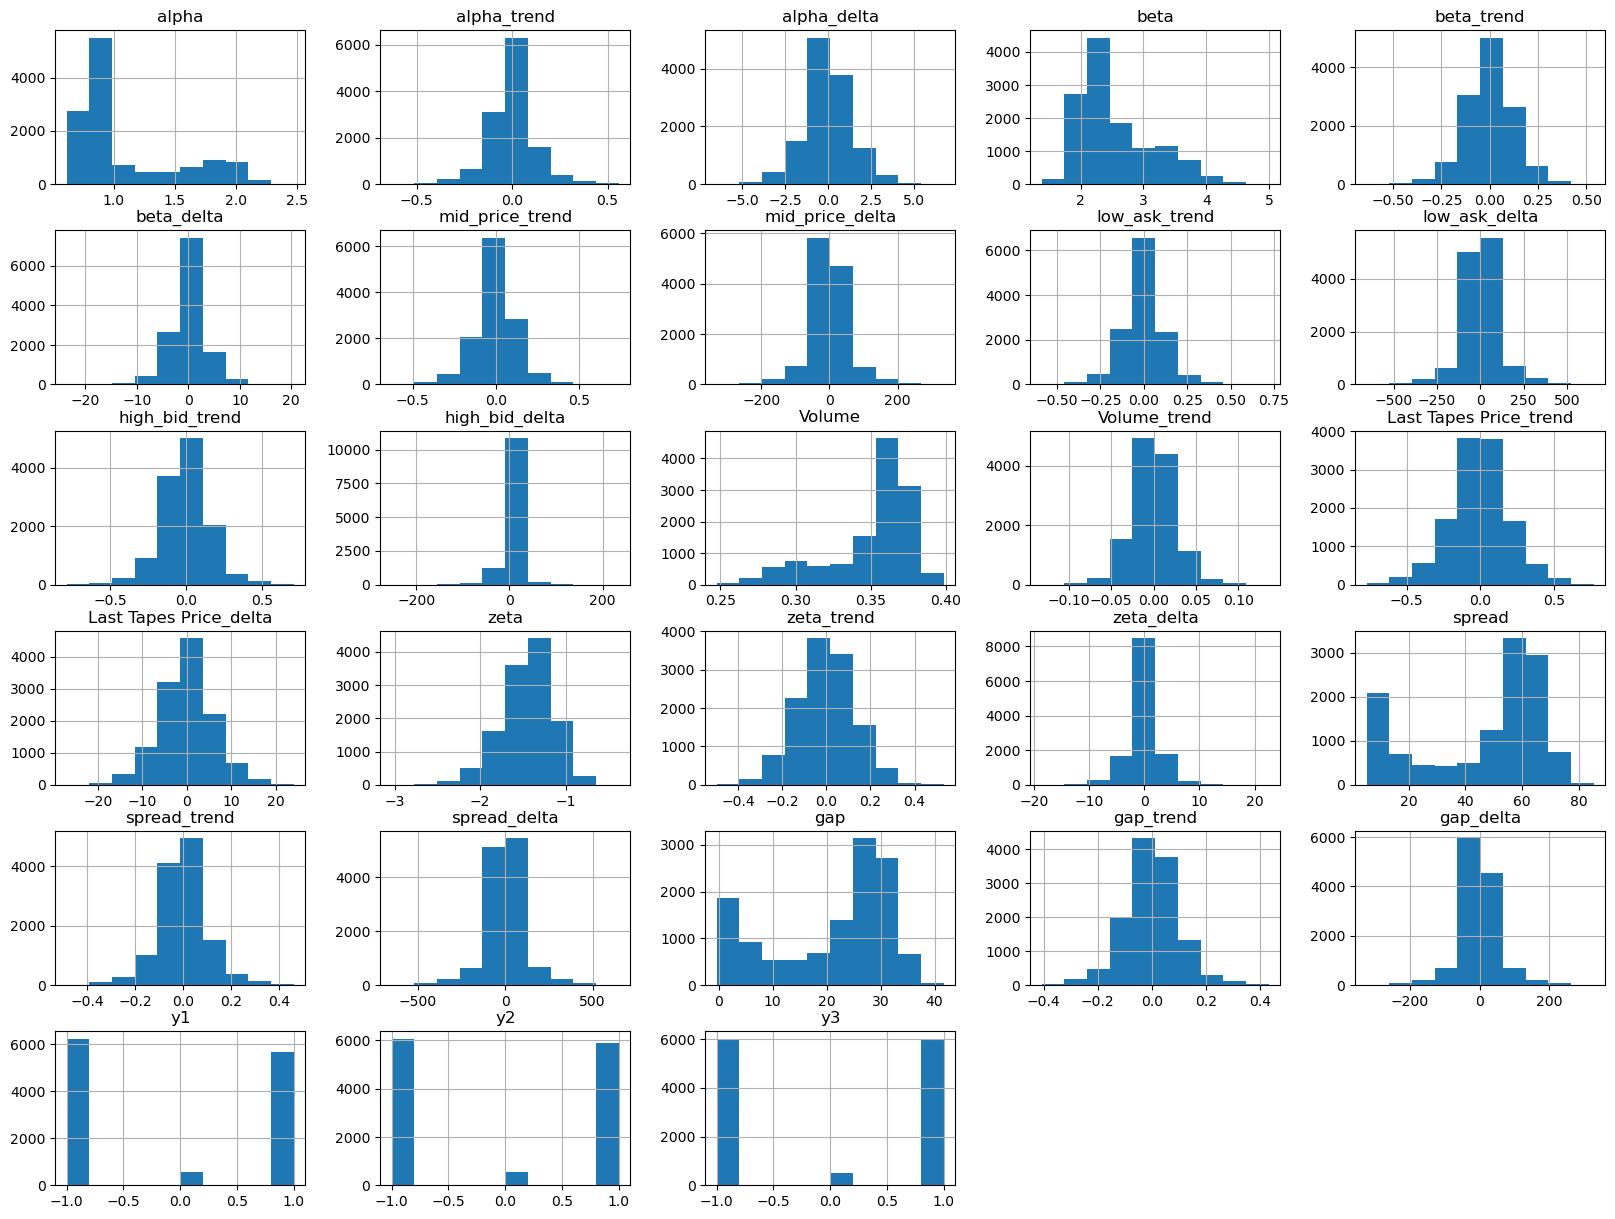

In [22]:
if "index" in list(sixty_df):
    sixty_df.drop(columns=["index"], inplace=True)
sixty_df.hist(figsize=(20,15))
plt.show()

# PCA

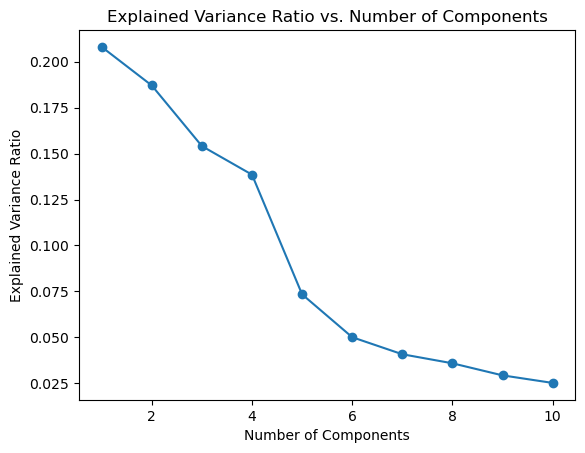

,PC1,PC2,PC3,PC4,PC5
0,1.282387,4.540863,1.175029,-1.751045,3.017019
1,-2.465420,2.359243,0.898591,0.496237,0.249317
2,0.498280,3.986568,-1.616294,3.250386,-0.958106
3,1.384336,2.261331,1.139733,0.872007,0.772996
4,-0.128977,4.067811,-1.892292,0.569398,-1.358618
...,...,...,...,...,...
12495,0.967003,-0.383960,-0.268395,-3.319533,0.534169
12496,1.054297,-0.312359,-0.701940,-0.046292,-0.371111
12497,1.320540,-0.831516,4.009111,1.491897,-2.333404
12498,1.220883,-1.073044,1.803141,-0.962980,0.435183


In [28]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x_feats = list(sixty_df)
x_feats.remove("y1")
x_feats.remove("y2")
x_feats.remove("y3")

# Assuming 'sixty_df' is your DataFrame
# Drop any non-numeric columns if present
x_sixty_df = sixty_df[x_feats]

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_sixty_df)

# Define the number of components (optional)
# If not specified, it will use all components
n_components = 10  # Example: You can change this to the number of components you want

# Initialize PCA
pca = PCA(n_components=n_components)

# Fit PCA to the scaled data
pca.fit(scaled_data)

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()

n_components = 5
pca = PCA(n_components=n_components)
pca.fit(scaled_data)
# Transform the data onto the new feature space
pca_transformed = pca.transform(scaled_data)

# Create a DataFrame for the transformed data (optional)
pca_df = pd.DataFrame(data=pca_transformed, columns=[f"PC{i+1}" for i in range(n_components)])
pca_df


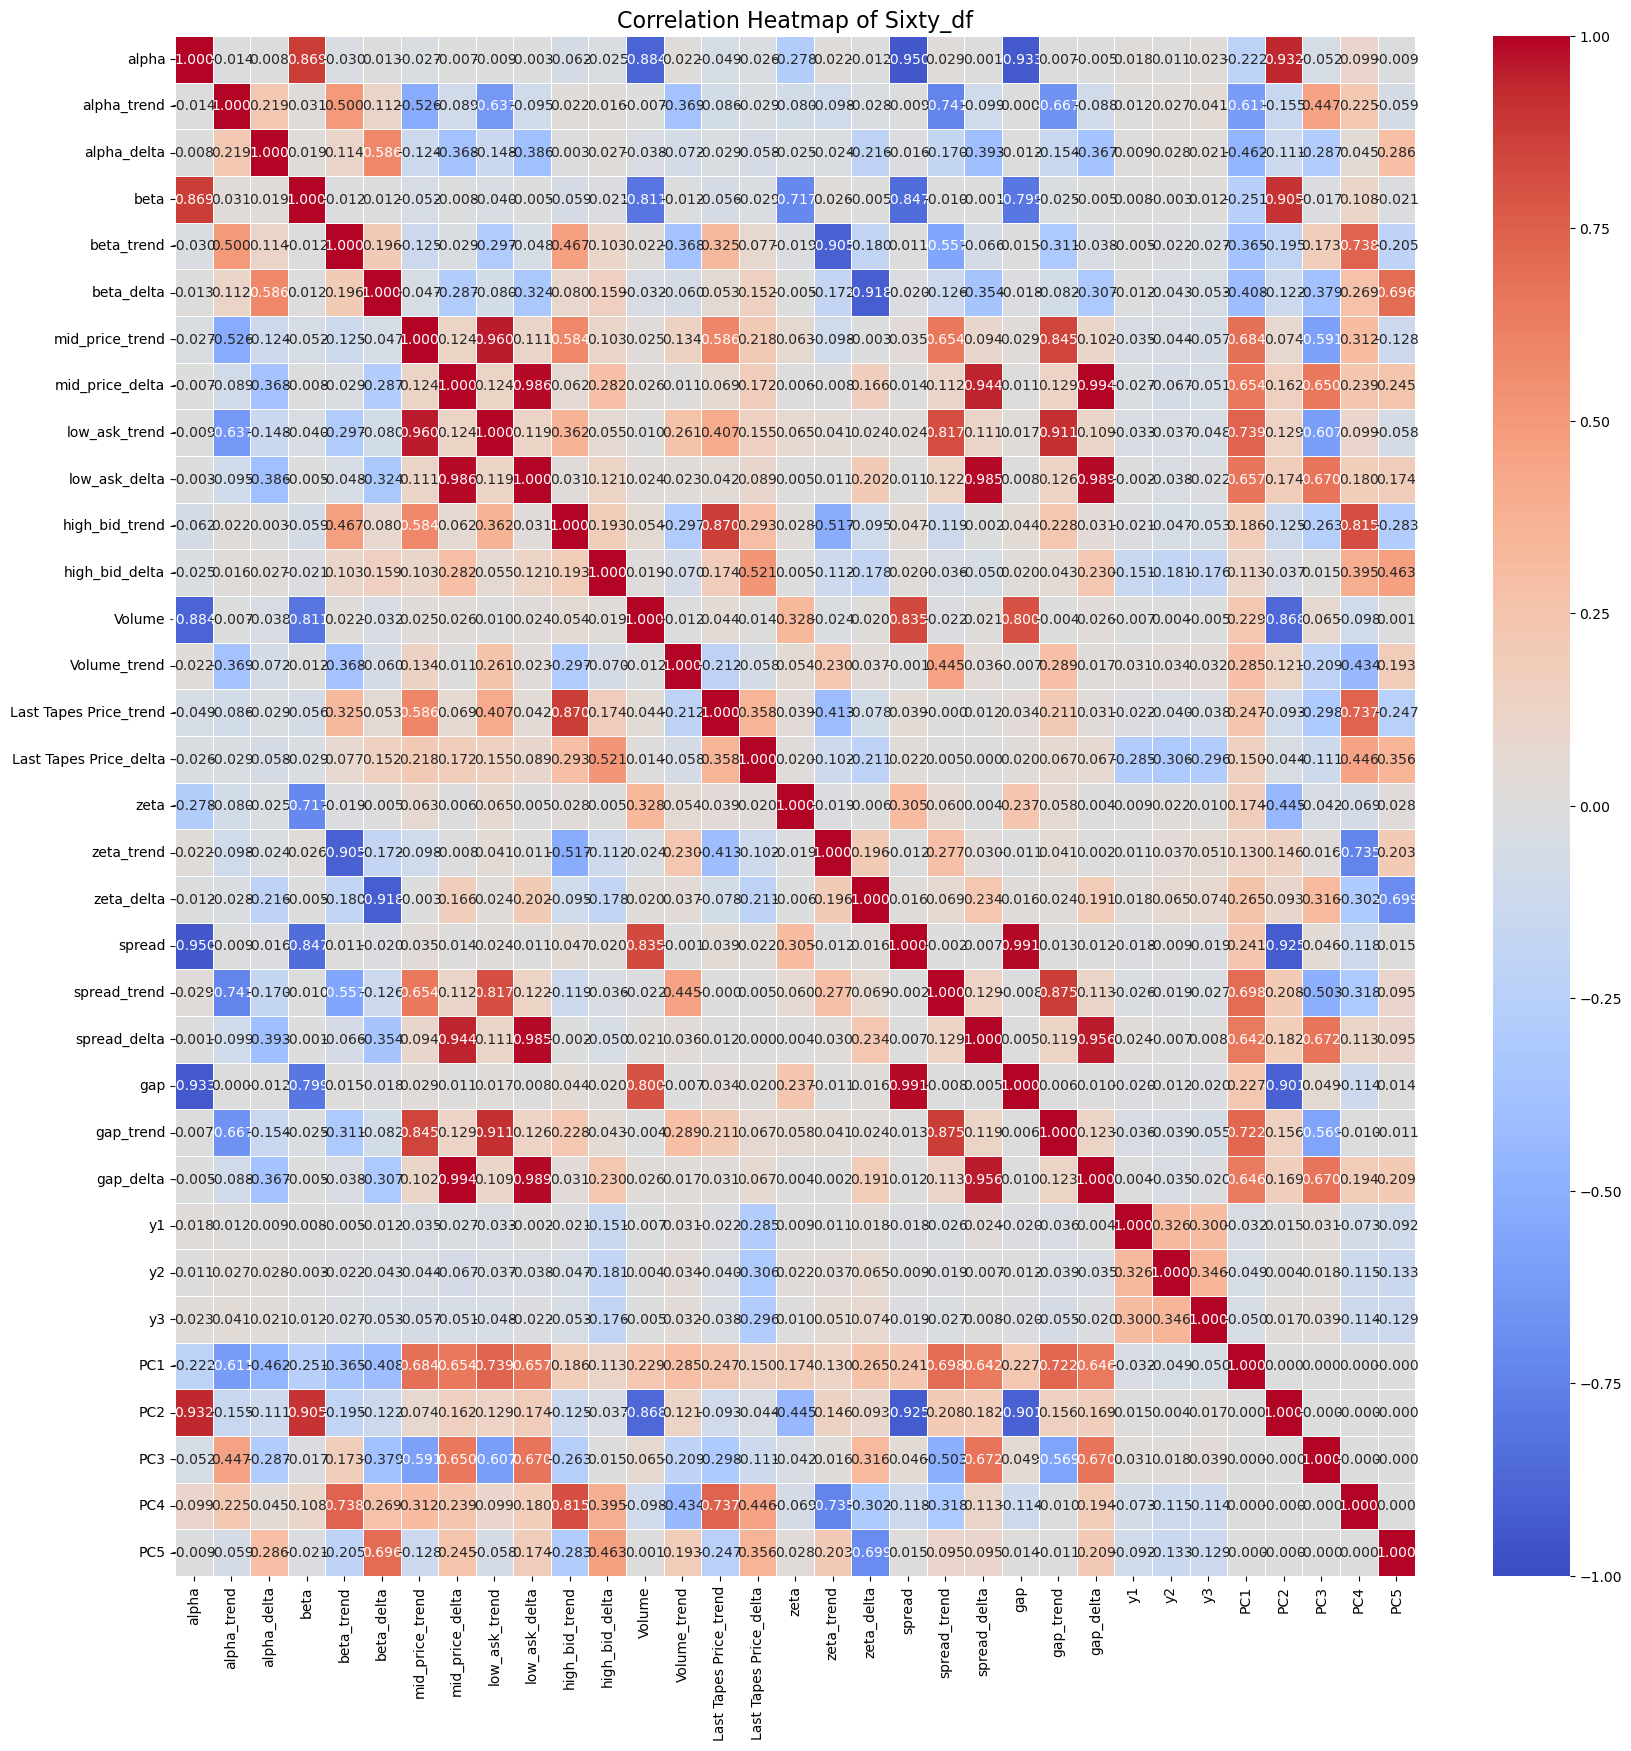

In [29]:
plt.figure(figsize=(20,20))
plt.title("Correlation Heatmap of Sixty_df", fontsize=16)

sns.heatmap(pd.concat([sixty_df, pca_df], axis = 1).corr(), annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5, vmin = -1, vmax = 1)
plt.show()

# Logistic Regression

In [30]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

y_feat = "y1"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))

# Create a logistic regression classifier
clf = LogisticRegression(random_state=random_state)
n_splits = 5  # You can adjust this as needed
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))

Sample size 11916
Cross-Validation Scores: [0.58473154 0.55224507 0.57322702 0.54972723 0.5568611 ]
Mean Accuracy: 0.5633583943312107
Baseline:  0.5238335011748909
Accuracy:  0.565038603558241
              precision    recall  f1-score   support

          -1       0.73      0.57      0.64      8047
           1       0.38      0.56      0.46      3869

    accuracy                           0.57     11916
   macro avg       0.56      0.56      0.55     11916
weighted avg       0.62      0.57      0.58     11916



In [31]:
y_feat = "y2"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))

# Create a logistic regression classifier
clf = LogisticRegression(random_state=random_state)
n_splits = 5  # You can adjust this as needed
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))

Sample size 11964
Cross-Validation Scores: [0.56748851 0.57584622 0.58671124 0.58963644 0.58904682]
Mean Accuracy: 0.5817458459525902
Baseline:  0.5076897358742896
Accuracy:  0.5829154129053828
              precision    recall  f1-score   support

          -1       0.62      0.58      0.60      6482
           1       0.54      0.58      0.56      5482

    accuracy                           0.58     11964
   macro avg       0.58      0.58      0.58     11964
weighted avg       0.59      0.58      0.58     11964



In [32]:
y_feat = "y3"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))

# Create a logistic regression classifier
clf = LogisticRegression(random_state=random_state)
n_splits = 5  # You can adjust this as needed
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))

Sample size 11989
Cross-Validation Scores: [0.59049208 0.57547957 0.59174312 0.58006672 0.58197747]
Mean Accuracy: 0.5839517912820551
Baseline:  0.5021269497038953
Accuracy:  0.5859537909750605
              precision    recall  f1-score   support

          -1       0.60      0.59      0.59      6204
           1       0.57      0.59      0.58      5785

    accuracy                           0.59     11989
   macro avg       0.59      0.59      0.59     11989
weighted avg       0.59      0.59      0.59     11989



# SVC

In [33]:
from sklearn.svm import SVC

y_feat = "y1"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))


clf = SVC(kernel='linear', random_state=random_state)
n_splits = 5  # You can adjust this as needed
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))

Sample size 11916
Cross-Validation Scores: [0.57885906 0.55224507 0.57280739 0.55937893 0.55266471]
Mean Accuracy: 0.5631910315517915
Baseline:  0.5238335011748909
Accuracy:  0.5641993957703928
              precision    recall  f1-score   support

          -1       0.81      0.56      0.66      9019
           1       0.30      0.58      0.39      2897

    accuracy                           0.56     11916
   macro avg       0.55      0.57      0.53     11916
weighted avg       0.68      0.56      0.60     11916



In [34]:
y_feat = "y2"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))


clf = SVC(kernel='linear', random_state=random_state)
n_splits = 5  # You can adjust this as needed
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))

Sample size 11964
Cross-Validation Scores: [0.57292102 0.57333891 0.59256164 0.59381529 0.59113712]
Mean Accuracy: 0.5847547962493728
Baseline:  0.5076897358742896
Accuracy:  0.5845035105315948
              precision    recall  f1-score   support

          -1       0.67      0.58      0.62      7061
           1       0.49      0.59      0.54      4903

    accuracy                           0.58     11964
   macro avg       0.58      0.59      0.58     11964
weighted avg       0.60      0.58      0.59     11964



In [35]:
y_feat = "y3"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))

clf = SVC(kernel='linear', random_state=random_state)
n_splits = 5  # You can adjust this as needed
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))

Sample size 11989
Cross-Validation Scores: [0.59132611 0.56880734 0.58256881 0.58590492 0.57863997]
Mean Accuracy: 0.5814494278537635
Baseline:  0.5021269497038953
Accuracy:  0.5839519559596297
              precision    recall  f1-score   support

          -1       0.65      0.58      0.61      6776
           1       0.52      0.59      0.55      5213

    accuracy                           0.58     11989
   macro avg       0.58      0.59      0.58     11989
weighted avg       0.59      0.58      0.59     11989



# Insights


In [36]:
from sklearn.model_selection import train_test_split

y_feat = "y3"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LogisticRegression(random_state=random_state)

clf.fit(X_train, y_train)

ypred = clf.predict(X_test)
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1-baseline))
print(accuracy_score(ypred, y_test))

# Extracting coefficients and feature names
coefficients = clf.coef_[0]
feature_names = X_train.columns

for i, c in enumerate(coefficients):
    print(feature_names[i], c)

Baseline:  0.5021269497038953
0.5896580483736447
PC1 -0.044461139811847405
PC2 0.017556743658351793
PC3 0.03968080283132611
PC4 -0.129493359935021
PC5 -0.2068088499309943


In [37]:
y_feat = "y3"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))

clf = SVC(kernel='linear', random_state=random_state)

# Define the number of folds for k-fold cross-validation
n_splits = 5  # You can adjust this as needed

# Initialize k-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

# Perform k-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Get feature importances
feature_importances = clf.coef_[0]

for i, c in enumerate(feature_importances):
    print(feature_names[i], c)

# Map feature importances to feature names if available
# Note: Since you used PCA, feature names may not be available
# If not available, you can simply use indices as feature names
# feature_names = pca_df.columns  # Assuming pca_df has column names
# Alternatively, you can use the original column names from sixty_df

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))

Sample size 11989
Cross-Validation Scores: [0.59132611 0.56880734 0.58256881 0.58590492 0.57863997]
Mean Accuracy: 0.5814494278537635
PC1 -0.08903544483791848
PC2 0.04304025685644319
PC3 0.0763115356688786
PC4 -0.23004151760159175
PC5 -0.3539297149490217
Baseline:  0.5021269497038953
Accuracy:  0.5839519559596297
              precision    recall  f1-score   support

          -1       0.65      0.58      0.61      6776
           1       0.52      0.59      0.55      5213

    accuracy                           0.58     11989
   macro avg       0.58      0.59      0.58     11989
weighted avg       0.59      0.58      0.59     11989



Let break down each PC:
 - PC1, highly correlated with -ve volume, -ve spread, alpha and beta. Generally capures the volume
 - PC2, highly correlated with spread_trend, low_ask_trend, -ve alpha_trend. Captures the sell pressure/activity
 - PC3, highly correlated with Last_Tapes_trend, high_bid_trend. Captures the bid pride trend
 - PC4, highly correlated with low_ask_delta, mid_price_delta. Captures the absolute change in ask price
 - PC5, highly correlated with beta_delta. The absolute change in bid pressure

Generally PC5 has the highest impact signifying a -ve classification a -ve change in price.